### <font color="green"> El siguiente paso es convertir los documentos de pdf en archivos de texto para poder realizar el analisis de discurso 

In [173]:
import urllib.request, urllib.parse, urllib.error
from urllib.request import urlopen

from bs4 import BeautifulSoup
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk import compat
from nltk.compat import Counter


from collections import Counter
import string

from nltk.corpus import stopwords
from nltk import word_tokenize

In [35]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### <font color="orange"> Previo a realizar los análisis de los archivos de texto debemos limpiarlos: definimos una función para eliminar la puntuación, las mayúscula y los enter(/n)

In [174]:
Doc038_2004 = open("documento038-2004.txt").read().lower()
Doc072_2005 = open("documento072-2005.txt").read().lower()
Doc122_2005 = open("documento122-2005.txt").read().lower()
Doc041_2006 = open("documento041-2006.txt").read().lower()
Doc073_2006 = open("documento073-2006.txt").read().lower()
Doc074_2006 = open("documento074-2006.txt").read().lower()
Doc075_2006 = open("documento075-2006.txt").read().lower()
DocCXC_2006 = open("documentoCXC-2006.txt").read().lower()
Doc085_2006 = open("documento085-2006.txt").read().lower()
Doc047_2007 = open("documento047-2007.txt").read().lower()
Doc070_2015 = open("documento070-2015.txt").read().lower()
Doc088_2016 = open("documento088-2016.txt").read().lower()

In [37]:
puntuacion = string.punctuation + '–¡¿”“•\r´'
puntuacion

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~–¡¿”“•\r´'

In [38]:
## Eliminando puntuación y enter

def elim_punt(string):
    transtable = string.maketrans('', '', puntuacion)
    sin_puntuacion= string.translate(transtable)
    limpio= sin_puntuacion.replace('\n','')
    return (limpio)

In [39]:
## Prueba de la funcion 
limpio_Doc038_2004 = elim_punt(Doc038_2004)
limpio_Doc072_2005 = elim_punt(Doc072_2005)
limpio_Doc122_2005 = elim_punt(Doc122_2005)
limpio_Doc041_2006 = elim_punt(Doc041_2006)
limpio_Doc073_2006 = elim_punt(Doc073_2006)
limpio_Doc074_2006 = elim_punt(Doc074_2006)
limpio_Doc075_2006 = elim_punt(Doc075_2006)
limpio_DocCXC_2006 = elim_punt(DocCXC_2006)
limpio_Doc085_2006 = elim_punt(Doc085_2006)
limpio_Doc047_2007 = elim_punt(Doc047_2007)
limpio_Doc070_2015 = elim_punt(Doc070_2015)
limpio_Doc088_2016 = elim_punt(Doc088_2016)

### <font color="orange"> Análisis anual del discurso, se define una función para identificar si las palabras importantes se encuentran dentro del documento y cuantas veces. 

In [40]:
## definimos función de identificación y conteo

def check(palabra, archivo):
    if palabra in archivo:
        print (True)
        conteo = archivo.count(palabra)
        print(conteo)
    else:
        print ("No está en el documento")    

In [41]:
# Se eliminan las stopwords para centrarnos en las palabras que realmente tienen que ver con el tema antes de sacar las frecuencias. 

stop_words = stopwords.words('spanish')

In [19]:
def no_stopwords(tokens):
    return [w for w in tokens if w not in stop_words]

In [42]:
palabras_importantes= ["confiabilidad", "cargo", "seguro", "opción", "financiera", "expansión", "mercado", "energía","remuneración", "inversión", "contratos", "señales", "escasez", "competitiva", "neutralidad", "política", "seguridad", "desabastecimiento", "capacidad", "firme","demanda", "cubrimiento", "disponibilidad", "eficiencia", "tecnología", "generación", "subasta","asegurar", "agentes", "suministro", "incentivos","plantas", "generadores", "bolsa", "combustibles", "gas", "líquidos", "prima", "riesgo", "compromiso","financiera", "optimización", "valoración","entrada","costos", "oferta","reglas", "fenómeno", "pico", "niño"]


### <font color="red"> 2004

In [43]:
final2004 = limpio_Doc038_2004

# Tokenize text 

final2004_tokens = word_tokenize(final2004)

# eliminamos las palabras que no son importantes del texto 

final2004_tokens = no_stopwords(final2004_tokens)


In [45]:
## Finalmente cuantos caracteres tiene el texto 
len(final2004_tokens)

6330

In [46]:
## Verificamos si las palabras importantes se encuentran en el texto y cuantas veces se repiten, usando la lista: palabras_importantes

for i in palabras_importantes: 
    check(i, final2004_tokens)
    print(i)

True
94
confiabilidad
True
87
cargo
No está en el documento
seguro
True
6
opción
True
1
financiera
True
8
expansión
True
122
mercado
True
109
energía
True
55
remuneración
True
28
inversión
True
21
contratos
True
15
señales
True
3
escasez
No está en el documento
competitiva
No está en el documento
neutralidad
No está en el documento
política
True
2
seguridad
True
2
desabastecimiento
True
47
capacidad
True
47
firme
True
46
demanda
True
3
cubrimiento
True
9
disponibilidad
True
1
eficiencia
True
2
tecnología
True
61
generación
True
9
subasta
No está en el documento
asegurar
True
27
agentes
True
10
suministro
True
2
incentivos
True
6
plantas
True
66
generadores
True
21
bolsa
True
2
combustibles
True
1
gas
No está en el documento
líquidos
True
18
prima
True
28
riesgo
No está en el documento
compromiso
True
1
financiera
True
7
optimización
True
12
valoración
True
3
entrada
True
29
costos
True
38
oferta
True
2
reglas
No está en el documento
fenómeno
True
11
pico
True
2
niño


In [47]:
# Encontramos la frecuencia de las palabras más comunes en el texto 

freq= nltk.FreqDist(final2004_tokens).most_common()
freq

[('mercado', 122),
 ('energía', 109),
 ('confiabilidad', 94),
 ('cargo', 87),
 ('generadores', 66),
 ('generación', 61),
 ('potencia', 58),
 ('precio', 55),
 ('remuneración', 55),
 ('firme', 47),
 ('capacidad', 47),
 ('demanda', 46),
 ('sistema', 44),
 ('plazo', 42),
 ('concepto', 40),
 ('i', 40),
 ('ser', 38),
 ('cada', 38),
 ('oferta', 38),
 ('largo', 37),
 ('asignación', 31),
 ('costos', 29),
 ('riesgo', 28),
 ('inversión', 28),
 ('agentes', 27),
 ('debe', 27),
 ('puede', 25),
 ('generador', 25),
 ('nivel', 25),
 ('condiciones', 23),
 ('función', 23),
 ('variables', 22),
 ('valor', 22),
 ('recursos', 22),
 ('contratos', 21),
 ('p', 21),
 ('determinar', 21),
 ('bolsa', 21),
 ('proceso', 20),
 ('firmeza', 20),
 ('mecanismo', 19),
 ('mediante', 18),
 ('prima', 18),
 ('precios', 18),
 ('anterior', 17),
 ('siguiente', 17),
 ('manera', 17),
 ('parte', 16),
 ('firma', 16),
 ('energética', 16),
 ('embalse', 15),
 ('determinación', 15),
 ('t', 15),
 ('ingresos', 15),
 ('regulador', 15),
 ('a

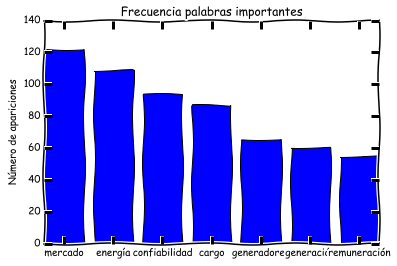

In [52]:
palabras= [item for item in freq if item[1] >= 50 and item[0] in palabras_importantes]
labels = [item[0] for item in palabras ]
values= [item[1] for item in palabras ]
with plt.xkcd():
    plt.title("Frecuencia palabras importantes")
    plt.ylabel("Número de apariciones")

    xs = np.arange(len(labels))

# Add labels (or "ticks") to X axis
    xtick_locs = xs + 0.4
    plt.xticks(xtick_locs, labels)

    plt.bar(xs, values);

### <font color="red"> 2005

In [53]:
final2005= limpio_Doc072_2005 + limpio_Doc122_2005

# Tokenize text 

final2005_tokens = word_tokenize(final2005)

# eliminamos las palabras que no son importantes del texto 

final2005_tokens = no_stopwords(final2005_tokens)

In [55]:
## Finalmente cuantos caracteres tiene el texto 

len(final2005_tokens)

8009

In [56]:
## Verificamos si las palabras importantes se encuentran en el texto y cuantas veces se repiten, usando la lista: palabras_importantes

for i in palabras_importantes: 
    check(i, final2005_tokens)
    print(i)

True
36
confiabilidad
True
70
cargo
No está en el documento
seguro
True
24
opción
No está en el documento
financiera
True
5
expansión
True
117
mercado
True
147
energía
True
31
remuneración
True
16
inversión
True
21
contratos
True
2
señales
No está en el documento
escasez
No está en el documento
competitiva
No está en el documento
neutralidad
No está en el documento
política
True
4
seguridad
No está en el documento
desabastecimiento
True
114
capacidad
True
114
firme
True
72
demanda
No está en el documento
cubrimiento
True
41
disponibilidad
True
18
eficiencia
True
10
tecnología
True
34
generación
True
55
subasta
True
5
asegurar
True
24
agentes
True
3
suministro
True
2
incentivos
True
29
plantas
True
75
generadores
True
18
bolsa
True
2
combustibles
True
4
gas
No está en el documento
líquidos
True
14
prima
True
20
riesgo
True
9
compromiso
No está en el documento
financiera
No está en el documento
optimización
True
3
valoración
True
4
entrada
True
14
costos
True
16
oferta
No está en el docu

In [57]:
# Encontramos la frecuencia de las palabras más comunes en el texto 

freq= nltk.FreqDist(final2005_tokens).most_common()
freq

[('energía', 147),
 ('cada', 123),
 ('mercado', 117),
 ('firme', 114),
 ('capacidad', 114),
 ('precio', 104),
 ('mecanismo', 84),
 ('asignación', 81),
 ('alternativa', 80),
 ('generadores', 75),
 ('demanda', 72),
 ('cargo', 70),
 ('alternativas', 63),
 ('subasta', 55),
 ('mediante', 53),
 ('generador', 53),
 ('ser', 50),
 ('años', 50),
 ('5', 45),
 ('implementación', 44),
 ('sistema', 43),
 ('disponibilidad', 41),
 ('período', 39),
 ('cinco', 39),
 ('requerimientos', 37),
 ('costo', 37),
 ('modelo', 37),
 ('confiabilidad', 36),
 ('ejercicio', 36),
 ('generación', 34),
 ('debe', 33),
 ('proceso', 33),
 ('procedimiento', 32),
 ('remuneración', 31),
 ('bien', 30),
 ('opciones', 29),
 ('realiza', 29),
 ('plantas', 29),
 ('existentes', 28),
 ('medida', 28),
 ('potencia', 28),
 ('evaluación', 26),
 ('corresponde', 26),
 ('precios', 26),
 ('determinación', 25),
 ('agentes', 24),
 ('plazo', 24),
 ('requiere', 24),
 ('opción', 24),
 ('planta', 23),
 ('pruebas', 23),
 ('creg', 23),
 ('cuales', 2

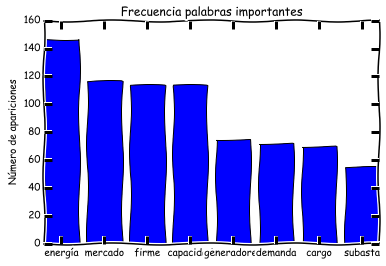

In [58]:
palabras= [item for item in freq if item[1] >= 50 and item[0] in palabras_importantes]
labels = [item[0] for item in palabras ]
values= [item[1] for item in palabras ]
with plt.xkcd():
    plt.title("Frecuencia palabras importantes")
    plt.ylabel("Número de apariciones")

    xs = np.arange(len(labels))

# Add labels (or "ticks") to X axis
    xtick_locs = xs + 0.4
    plt.xticks(xtick_locs, labels)

    plt.bar(xs, values);

### <font color="red"> 2006

In [60]:
final2006= limpio_Doc041_2006 + limpio_Doc073_2006 + limpio_Doc074_2006 + limpio_Doc075_2006 + limpio_DocCXC_2006 + limpio_Doc085_2006 

# Tokenize text 

final2006_tokens = word_tokenize(final2006)

# eliminamos las palabras que no son importantes del texto 

final2006_tokens = no_stopwords(final2006_tokens)

In [61]:
## Finalmente cuantos caracteres tiene el texto 

len(final2006_tokens)

64372

In [62]:
## Verificamos si las palabras importantes se encuentran en el texto y cuantas veces se repiten, usando la lista: palabras_importantes

for i in palabras_importantes: 
    check(i, final2006_tokens)
    print(i)

True
448
confiabilidad
True
386
cargo
True
2
seguro
True
32
opción
True
13
financiera
True
41
expansión
True
488
mercado
True
1515
energía
True
141
remuneración
True
75
inversión
True
226
contratos
True
39
señales
True
66
escasez
True
2
competitiva
True
1
neutralidad
True
12
política
True
61
seguridad
True
1
desabastecimiento
True
292
capacidad
True
930
firme
True
395
demanda
True
30
cubrimiento
True
91
disponibilidad
True
41
eficiencia
True
15
tecnología
True
460
generación
True
404
subasta
True
32
asegurar
True
252
agentes
True
168
suministro
True
13
incentivos
True
504
plantas
True
256
generadores
True
157
bolsa
True
145
combustibles
True
215
gas
True
20
líquidos
True
60
prima
True
74
riesgo
True
49
compromiso
True
13
financiera
True
39
optimización
True
34
valoración
True
30
entrada
True
130
costos
True
123
oferta
True
37
reglas
True
2
fenómeno
True
2
pico
True
2
niño


In [63]:
# Encontramos la frecuencia de las palabras más comunes en el texto 

freq= nltk.FreqDist(final2006_tokens).most_common()
freq

[('energía', 1515),
 ('firme', 930),
 ('plantas', 504),
 ('precio', 495),
 ('mercado', 488),
 ('generación', 460),
 ('confiabilidad', 448),
 ('subasta', 404),
 ('planta', 399),
 ('demanda', 395),
 ('cargo', 386),
 ('debe', 367),
 ('obligación', 299),
 ('capacidad', 292),
 ('sistema', 284),
 ('generador', 275),
 ('creg', 268),
 ('ser', 266),
 ('caso', 260),
 ('generadores', 256),
 ('ver', 253),
 ('agentes', 252),
 ('obligaciones', 247),
 ('respuesta', 243),
 ('cada', 242),
 ('resolución', 238),
 ('contratos', 226),
 ('período', 221),
 ('propuesta', 221),
 ('si', 217),
 ('gas', 215),
 ('valor', 203),
 ('cálculo', 193),
 ('puede', 191),
 ('precios', 186),
 ('condiciones', 181),
 ('agente', 181),
 ('mecanismo', 180),
 ('combustible', 180),
 ('metodología', 174),
 ('suministro', 168),
 ('asignación', 162),
 ('forma', 161),
 ('operación', 158),
 ('cuenta', 157),
 ('bolsa', 157),
 ('2006', 156),
 ('documento', 154),
 ('artículo', 153),
 ('información', 153),
 ('comisión', 151),
 ('parte', 148

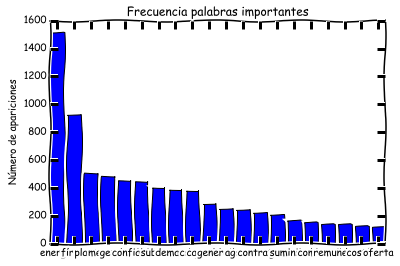

In [64]:
palabras= [item for item in freq if item[1] >= 100 and item[0] in palabras_importantes]
labels = [item[0] for item in palabras ]
values= [item[1] for item in palabras ]
with plt.xkcd():
    plt.title("Frecuencia palabras importantes")
    plt.ylabel("Número de apariciones")

    xs = np.arange(len(labels))

# Add labels (or "ticks") to X axis
    xtick_locs = xs + 0.4
    plt.xticks(xtick_locs, labels)

    plt.bar(xs, values);

### <font color="red"> 2007

In [65]:
final2007= limpio_Doc047_2007

# Tokenize text 

final2007_tokens = word_tokenize(final2007)

# eliminamos las palabras que no son importantes del texto 

final2007_tokens = no_stopwords(final2007_tokens)

In [66]:

## Finalmente cuantos caracteres tiene el texto 

len(final2007_tokens)

2140

In [67]:
## Verificamos si las palabras importantes se encuentran en el texto y cuantas veces se repiten, usando la lista: palabras_importantes

for i in palabras_importantes: 
    check(i, final2007_tokens)
    print(i)

True
10
confiabilidad
True
12
cargo
No está en el documento
seguro
No está en el documento
opción
No está en el documento
financiera
No está en el documento
expansión
True
2
mercado
True
12
energía
True
6
remuneración
True
2
inversión
No está en el documento
contratos
True
2
señales
True
21
escasez
True
1
competitiva
No está en el documento
neutralidad
No está en el documento
política
No está en el documento
seguridad
No está en el documento
desabastecimiento
True
2
capacidad
True
7
firme
True
3
demanda
No está en el documento
cubrimiento
No está en el documento
disponibilidad
True
8
eficiencia
No está en el documento
tecnología
True
7
generación
No está en el documento
subasta
No está en el documento
asegurar
True
3
agentes
True
1
suministro
No está en el documento
incentivos
True
34
plantas
No está en el documento
generadores
True
2
bolsa
True
14
combustibles
True
5
gas
True
6
líquidos
True
1
prima
No está en el documento
riesgo
No está en el documento
compromiso
No está en el docume

In [68]:
# Encontramos la frecuencia de las palabras más comunes en el texto 

freq= nltk.FreqDist(final2007_tokens).most_common()
freq

[('oil', 57),
 ('precio', 41),
 ('fuel', 40),
 ('planta', 39),
 ('0', 34),
 ('plantas', 34),
 ('6', 33),
 ('hr', 31),
 ('2', 28),
 ('escasez', 21),
 ('1', 21),
 ('análisis', 18),
 ('h', 18),
 ('creg047', 18),
 ('i', 18),
 ('gráfica', 16),
 ('r', 15),
 ('existente', 14),
 ('combustibles', 14),
 ('neto', 13),
 ('energía', 12),
 ('cargo', 12),
 ('térmicas', 12),
 ('costos', 12),
 ('fenómeno', 12),
 ('2007sesión', 11),
 ('confiabilidad', 10),
 ('vpn', 10),
 ('diesel', 9),
 ('valor', 9),
 ('combustible', 9),
 ('s', 9),
 ('nueva', 9),
 ('70', 9),
 ('m', 9),
 ('cuenta', 9),
 ('heat', 8),
 ('resultados', 8),
 ('100', 8),
 ('eficiencia', 8),
 ('31', 8),
 ('niño', 8),
 ('rate', 8),
 ('10', 8),
 ('generación', 7),
 ('firme', 7),
 ('9', 7),
 ('período', 7),
 ('eficiencias', 7),
 ('33', 7),
 ('32', 7),
 ('n', 7),
 ('8', 7),
 ('duración', 7),
 ('ciclo', 7),
 ('obligaciones', 7),
 ('tabla', 6),
 ('acuerdo', 6),
 ('5', 6),
 ('f', 6),
 ('presente', 6),
 ('caso', 6),
 ('130', 6),
 ('variables', 6),
 ('e

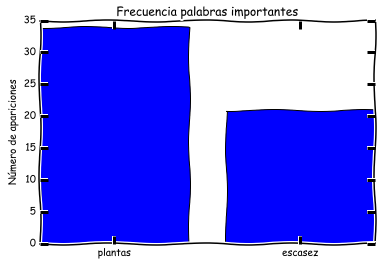

In [69]:
palabras= [item for item in freq if item[1] >= 20 and item[0] in palabras_importantes]
labels = [item[0] for item in palabras ]
values= [item[1] for item in palabras ]
with plt.xkcd():
    plt.title("Frecuencia palabras importantes")
    plt.ylabel("Número de apariciones")

    xs = np.arange(len(labels))

# Add labels (or "ticks") to X axis
    xtick_locs = xs + 0.4
    plt.xticks(xtick_locs, labels)

    plt.bar(xs, values);

### <font color="red"> 2015-2016

In [70]:
final2015_2016= limpio_Doc070_2015 + limpio_Doc088_2016

# Tokenize text 

final2015_2016_tokens = word_tokenize(final2015_2016)

# eliminamos las palabras que no son importantes del texto 

final2015_2016_tokens = no_stopwords(final2015_2016_tokens)


In [73]:

## Finalmente cuantos caracteres tiene el texto 

len(final2015_2016_tokens)

7241

In [72]:
## Verificamos si las palabras importantes se encuentran en el texto y cuantas veces se repiten, usando la lista: palabras_importantes

for i in palabras_importantes: 
    check(i, final2015_2016_tokens)
    print(i)

True
64
confiabilidad
True
84
cargo
No está en el documento
seguro
True
9
opción
True
1
financiera
True
7
expansión
True
48
mercado
True
112
energía
True
7
remuneración
True
4
inversión
True
21
contratos
True
7
señales
True
101
escasez
No está en el documento
competitiva
True
2
neutralidad
True
2
política
No está en el documento
seguridad
No está en el documento
desabastecimiento
True
4
capacidad
True
36
firme
True
50
demanda
True
6
cubrimiento
True
5
disponibilidad
True
10
eficiencia
True
2
tecnología
True
47
generación
True
42
subasta
True
5
asegurar
True
24
agentes
True
10
suministro
No está en el documento
incentivos
True
96
plantas
True
38
generadores
True
39
bolsa
True
28
combustibles
True
31
gas
True
16
líquidos
True
15
prima
True
34
riesgo
True
3
compromiso
True
1
financiera
No está en el documento
optimización
No está en el documento
valoración
True
43
entrada
True
41
costos
True
25
oferta
True
13
reglas
True
8
fenómeno
No está en el documento
pico
True
8
niño


In [74]:
# Encontramos la frecuencia de las palabras más comunes en el texto 

freq= nltk.FreqDist(final2015_2016_tokens).most_common()
freq

[('precio', 157),
 ('energía', 112),
 ('escasez', 101),
 ('plantas', 96),
 ('cargo', 84),
 ('creg', 72),
 ('confiabilidad', 64),
 ('precios', 64),
 ('asignación', 60),
 ('demanda', 50),
 ('mercado', 48),
 ('documento', 47),
 ('generación', 47),
 ('entrada', 43),
 ('s', 42),
 ('subasta', 42),
 ('costos', 41),
 ('propuestas', 41),
 ('bolsa', 39),
 ('generadores', 38),
 ('firme', 36),
 ('asignaciones', 36),
 ('planta', 35),
 ('oef', 35),
 ('propuesta', 35),
 ('riesgo', 34),
 ('gas', 31),
 ('alternativas', 31),
 ('existentes', 28),
 ('combustibles', 28),
 ('variables', 26),
 ('alternativa', 26),
 ('nivel', 26),
 ('oferta', 25),
 ('resolución', 25),
 ('agentes', 24),
 ('puede', 24),
 ('2014', 24),
 ('recursos', 24),
 ('costo', 24),
 ('077', 23),
 ('nuevasplantas', 23),
 ('debe', 22),
 ('cxc', 22),
 ('anterior', 21),
 ('contratos', 21),
 ('regulación', 21),
 ('ser', 20),
 ('comentarios', 20),
 ('parte', 19),
 ('generador', 19),
 ('mediante', 18),
 ('preco', 18),
 ('dos', 18),
 ('4', 18),
 ('

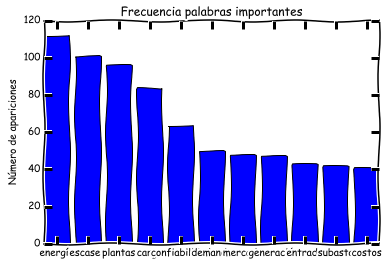

In [80]:
palabras= [item for item in freq if item[1] >= 40 and item[0] in palabras_importantes]
labels = [item[0] for item in palabras ]
values= [item[1] for item in palabras ]
with plt.xkcd():
    plt.title("Frecuencia palabras importantes")
    plt.ylabel("Número de apariciones")

    xs = np.arange(len(labels))

# Add labels (or "ticks") to X axis
    xtick_locs = xs + 0.4
    plt.xticks(xtick_locs, labels)

    plt.bar(xs, values);

### <font color="red"> Periodo 2004-2007

In [81]:
final_periodo1= final2004_tokens + final2005_tokens + final2006_tokens + final2007_tokens

In [82]:

len(final_periodo1)

80851

In [83]:
## Verificamos si las palabras importantes se encuentran en el texto y cuantas veces se repiten, usando la lista: palabras_importantes

for i in palabras_importantes: 
    check(i, final_periodo1)
    print(i)

True
588
confiabilidad
True
555
cargo
True
2
seguro
True
62
opción
True
14
financiera
True
54
expansión
True
729
mercado
True
1783
energía
True
233
remuneración
True
121
inversión
True
268
contratos
True
58
señales
True
90
escasez
True
3
competitiva
True
1
neutralidad
True
12
política
True
67
seguridad
True
3
desabastecimiento
True
455
capacidad
True
1098
firme
True
516
demanda
True
33
cubrimiento
True
141
disponibilidad
True
68
eficiencia
True
27
tecnología
True
562
generación
True
468
subasta
True
37
asegurar
True
306
agentes
True
182
suministro
True
17
incentivos
True
573
plantas
True
397
generadores
True
198
bolsa
True
163
combustibles
True
225
gas
True
26
líquidos
True
93
prima
True
122
riesgo
True
58
compromiso
True
14
financiera
True
46
optimización
True
49
valoración
True
37
entrada
True
185
costos
True
181
oferta
True
39
reglas
True
14
fenómeno
True
15
pico
True
12
niño


In [84]:
# Encontramos la frecuencia de las palabras más comunes en el texto 

freq=nltk.FreqDist(final_periodo1).most_common()
freq

[('energía', 1783),
 ('firme', 1098),
 ('mercado', 729),
 ('precio', 695),
 ('confiabilidad', 588),
 ('plantas', 573),
 ('generación', 562),
 ('cargo', 555),
 ('demanda', 516),
 ('subasta', 468),
 ('planta', 466),
 ('capacidad', 455),
 ('debe', 428),
 ('cada', 405),
 ('generadores', 397),
 ('sistema', 375),
 ('generador', 357),
 ('ser', 355),
 ('obligación', 308),
 ('agentes', 306),
 ('creg', 297),
 ('caso', 291),
 ('mecanismo', 283),
 ('período', 277),
 ('asignación', 274),
 ('contratos', 268),
 ('obligaciones', 261),
 ('ver', 255),
 ('resolución', 255),
 ('respuesta', 249),
 ('valor', 248),
 ('propuesta', 241),
 ('si', 235),
 ('puede', 234),
 ('remuneración', 233),
 ('precios', 233),
 ('gas', 225),
 ('condiciones', 221),
 ('cálculo', 208),
 ('agente', 205),
 ('combustible', 202),
 ('bolsa', 198),
 ('operación', 192),
 ('metodología', 190),
 ('años', 190),
 ('i', 188),
 ('ejercicio', 187),
 ('costos', 185),
 ('1', 185),
 ('información', 183),
 ('suministro', 182),
 ('oferta', 181),
 (

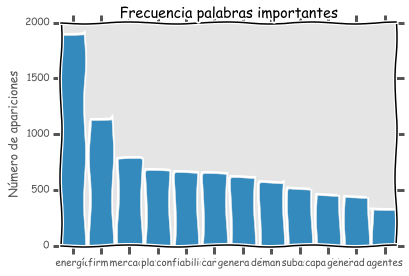

In [116]:
palabras= [item for item in freq if item[1] >= 300 and item[0] in palabras_importantes]
labels = [item[0] for item in palabras ]
values= [item[1] for item in palabras ]
with plt.xkcd():
    plt.title("Frecuencia palabras importantes")
    plt.ylabel("Número de apariciones")

    xs = np.arange(len(labels))

# Add labels (or "ticks") to X axis
    xtick_locs = xs + 0.4
    plt.xticks(xtick_locs, labels)

    plt.bar(xs, values);

### <font color="green"> Finalmente, realizamos una nube que palabras que identifique los patrones de frecuencia de las palabras claves en los documentos 

### <font color="Orange"> Se grafica el número de documentos expedidos en los años de análisis sobre el cargo por confiabilidad 

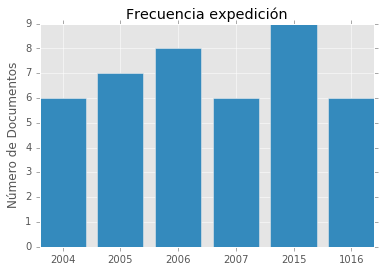

In [131]:

labels = [2004, 2005, 2006, 2007, 2015, 1016]
values= [6,7,8,6,9,6]

plt.title("Frecuencia expedición")
plt.ylabel("Número de Documentos")

xs = np.arange(len(labels))

# Add labels (or "ticks") to X axis
xtick_locs = xs + 0.4
plt.xticks(xtick_locs, labels)

plt.bar(xs, values);


In [95]:
# Para este paso se realiza la compilación de los dos periodos de tiempo analizados

total= final_periodo1 + final_periodo2

In [155]:
total


list

In [96]:
len(total)

88092

In [97]:
## Verificamos si las palabras importantes se encuentran en el texto y cuantas veces se repiten, usando la lista: palabras_importantes

for i in palabras_importantes: 
    check(i, total)
    print(i)

True
652
confiabilidad
True
639
cargo
True
2
seguro
True
71
opción
True
15
financiera
True
61
expansión
True
777
mercado
True
1895
energía
True
240
remuneración
True
125
inversión
True
289
contratos
True
65
señales
True
191
escasez
True
3
competitiva
True
3
neutralidad
True
14
política
True
67
seguridad
True
3
desabastecimiento
True
459
capacidad
True
1134
firme
True
566
demanda
True
39
cubrimiento
True
146
disponibilidad
True
78
eficiencia
True
29
tecnología
True
609
generación
True
510
subasta
True
42
asegurar
True
330
agentes
True
192
suministro
True
17
incentivos
True
669
plantas
True
435
generadores
True
237
bolsa
True
191
combustibles
True
256
gas
True
42
líquidos
True
108
prima
True
156
riesgo
True
61
compromiso
True
15
financiera
True
46
optimización
True
49
valoración
True
80
entrada
True
226
costos
True
206
oferta
True
52
reglas
True
22
fenómeno
True
15
pico
True
20
niño


In [98]:
# Encontramos la frecuencia de las palabras más comunes en el texto 

freq= nltk.FreqDist(total).most_common()
freq

[('energía', 1895),
 ('firme', 1134),
 ('precio', 852),
 ('mercado', 777),
 ('plantas', 669),
 ('confiabilidad', 652),
 ('cargo', 639),
 ('generación', 609),
 ('demanda', 566),
 ('subasta', 510),
 ('planta', 501),
 ('capacidad', 459),
 ('debe', 450),
 ('generadores', 435),
 ('cada', 409),
 ('sistema', 389),
 ('generador', 376),
 ('ser', 375),
 ('creg', 369),
 ('asignación', 334),
 ('agentes', 330),
 ('obligación', 310),
 ('mecanismo', 300),
 ('caso', 298),
 ('precios', 297),
 ('contratos', 289),
 ('período', 289),
 ('resolución', 280),
 ('obligaciones', 276),
 ('propuesta', 276),
 ('puede', 258),
 ('ver', 258),
 ('gas', 256),
 ('respuesta', 253),
 ('valor', 252),
 ('remuneración', 240),
 ('si', 240),
 ('bolsa', 237),
 ('condiciones', 235),
 ('costos', 226),
 ('documento', 226),
 ('cálculo', 211),
 ('agente', 210),
 ('combustible', 210),
 ('operación', 207),
 ('oferta', 206),
 ('1', 202),
 ('parte', 200),
 ('metodología', 199),
 ('años', 199),
 ('i', 198),
 ('ejercicio', 194),
 ('sumini

In [99]:
type(freq)

list

In [104]:
palabras= [item for item in freq if item[1] >= 300 and item[0] in palabras_importantes]

In [105]:
palabras

[('energía', 1895),
 ('firme', 1134),
 ('mercado', 777),
 ('plantas', 669),
 ('confiabilidad', 652),
 ('cargo', 639),
 ('generación', 609),
 ('demanda', 566),
 ('subasta', 510),
 ('capacidad', 459),
 ('generadores', 435),
 ('agentes', 330)]

In [135]:
labels = [item[0] for item in palabras ]
values= [item[1] for item in palabras ]


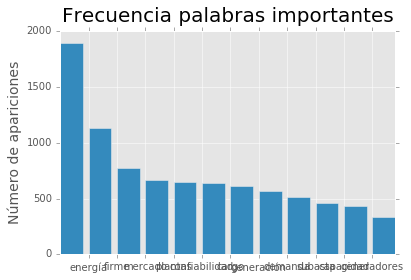

In [147]:
plt.title("Frecuencia palabras importantes",fontdict= {'fontsize': 20, 'verticalalignment': 'bottom'})
plt.ylabel("Número de apariciones", fontdict={'fontsize': 14})

xs = np.arange(len(labels))

# Add labels (or "ticks") to X axis
xtick_locs = xs + 1
plt.xticks(xtick_locs, labels)

plt.bar(xs, values);

In [159]:
total_doc = final2004 + final2005 + final2006+ final2007 + final2015_2016

In [160]:
total_tokens = word_tokenize(total_doc)

In [165]:
total_texto = nltk.Text(total_tokens)

In [166]:
total_texto.collocations(num = 100)

energía firme; cargo por; por confiabilidad; ver respuesta; las
plantas; los agentes; los generadores; fuel oil; gas natural; del
cargo; mercado secundario; cada uno; del sistema; largo plazo; costos
variables; del mercado; las obligaciones; acuerdo con; plantas
térmicas; sin embargo; corto plazo; debe ser; condiciones críticas;
por confiabilidadrespuesta; así como; mercado mayorista; documento
creg; una planta; despacho ideal; contar con; todos los; las subastas;
por capacidad; por concepto; mínimos operativos; por parte; última
instancia; combustibles líquidos; los precios; los contratos; los
recursos; plantas hidráulicas; dem anda; dado que; puede ser; heat
rate; los resultados; diferencia entre; para cada; una vez; los
cuales; cada generador; este caso; las condiciones; despachadas
centralmente; las siguientes; las características; los siguientes;
condición crítica; conformidad con; resolución creg; para efectos; del
precio; combustible alterno; energía fírme; nuevos proyectos; las

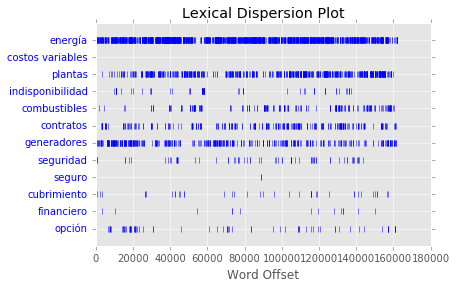

In [172]:
total_texto.dispersion_plot(['energía', 'costos variables', 'plantas', 'indisponibilidad', 'combustibles', 'contratos',\
                                   'generadores', 'seguridad', "seguro", "cubrimiento", "financiero", "opción", ])

### <font color="pink"> Nube de palabras

In [108]:
! python -m pip install -U pip

Requirement already up-to-date: pip in c:\anaconda3\lib\site-packages


In [109]:
!pip install wordcloud

In [110]:
!pip install -r requirements.txt

In [150]:
from os import path
from PIL import Image
from wordcloud import WordCloud

ImportError: No module named 'wordcloud.query_integral_image'

In [149]:
d = path.dirname('/users/AndegM2016/Desktop/Clases de Python/Talleres/trabajo final')

# Read the whole text
text = open(path.join(d, 'palabras_importantes.txt')).read()
# Read the mask image

lightbulb_mask = np.array(Image.open("light_bulb.png"))

wc = WordCloud(background_color="white", max_words=2000, mask=lightbulb_mask)

# Generate word cloud
wc.generate(text)

# Store to file
wc.to_file("light_bulb.png")

# Show

plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.imshow(lightbulb_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/users/AndegM2016/Desktop/Clases de Python/Talleres\\palabras_importantes.txt'